## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
data=pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data=data[['v1','v2']]
data=data.rename(columns={'v1':'labels','v2':'message'})

In [4]:
data.head(10)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
data.shape

(5572, 2)

In [6]:
data['labels'].value_counts()


ham     4825
spam     747
Name: labels, dtype: int64

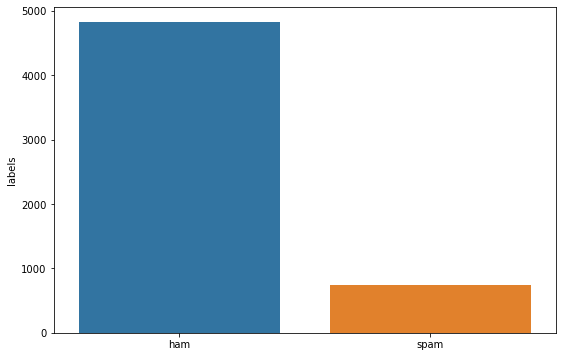

In [7]:
plt.figure(figsize=(9,6))
sns.barplot(x=data['labels'].value_counts().index,y=data['labels'].value_counts(),data=data)
plt.show()

## Dataset Cleaning

In [8]:

import nltk
nltk.download('stopwords')
nltk.download()




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range (0,len(data)):
    review=re.sub('[^a-zA-Z]',' ',data['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word)for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [11]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

## TermFrequency and InverseDocumentFrequency

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
x=cv.fit_transform(corpus).toarray()

In [13]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
y=pd.get_dummies(data['labels'])
y=y.iloc[:,1].values

In [15]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

## Splitting data into train and test dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
## Using NaiveBayes Classifier
from sklearn.naive_bayes import MultinomialNB
spam_detection=MultinomialNB().fit(x_train,y_train)

In [18]:
y_pred=spam_detection.predict(x_test)

In [19]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac=accuracy_score(y_test, y_pred)
print(ac*100)

[[949   0]
 [ 46 120]]
95.87443946188341


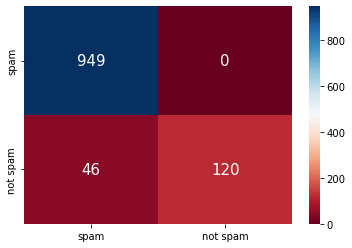

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='RdBu',fmt='d',
            cbar=True,xticklabels=['spam','not spam'],yticklabels=['spam','not spam'],
            annot_kws={'fontsize':15})
plt.show()